In [ ]:
### Correlations between results from the two methods
# Compute correlation between political economy weights across the methods (rho_lambda)

import pandas as pd
import numpy as np

lam_ossa = pd.read_csv('replication/04_output/lambda_ossa_noUB.csv', header=None)
lam_gn = pd.read_csv('replication/04_output/lambda_gn_noUB.csv', header=None)

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

n_country, n_ind = lam_ossa.shape
corr_lam = []

for c in range(n_country):
    corr = np.corrcoef(lam_ossa.iloc[c, :], lam_gn.iloc[c, :])[0, 1]
    corr_lam.append(corr)

df_corr = pd.DataFrame({
    "Country": countries,
    "Corr. (lambda)": corr_lam
})

pd.options.display.float_format = "{:.3f}".format

print(df_corr)

  Country  Corr. (lambda)
0  Brazil           1.000
1   China           1.000
2      EU           1.000
3   India           0.745
4   Japan           0.996
5     ROW           1.000
6      US           1.000


In [ ]:
# Correlation of optimal tariffs between methods (rho_tau)

import pandas as pd
import numpy as np

t_ossa = pd.read_csv('replication/04_output/optimal_tariff_ossa_noUB.csv', header=None)
t_gn   = pd.read_csv('replication/04_output/optimal_tariff_gn_noUB.csv',   header=None)

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

n_country, n_ind = t_ossa.shape
corr_tariff = []

for c in range(n_country):
    corr = np.corrcoef(t_ossa.iloc[c, :], t_gn.iloc[c, :])[0, 1]
    corr_tariff.append(corr)

df_corr_tariff = pd.DataFrame({
    "Country": countries,
    "Corr. (opt. tariff)": corr_tariff
})

pd.options.display.float_format = "{:.3f}".format

print(df_corr_tariff)


  Country  Corr. (opt. tariff)
0  Brazil                0.999
1   China                1.000
2      EU                1.000
3   India                0.910
4   Japan                0.997
5     ROW                1.000
6      US                0.999


In [ ]:
# Spearman correlation (rank of optimal tariffs between methods, rho_rank)

import pandas as pd
import numpy as np
from scipy.stats import spearmanr

t_ossa = pd.read_csv('replication/04_output/optimal_tariff_ossa_noUB.csv', header=None)
t_gn   = pd.read_csv('replication/04_output/optimal_tariff_gn_noUB.csv',   header=None)

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

n_country, n_ind = t_ossa.shape

rank_by_country = []

for c in range(n_country):
    r1 = t_ossa.iloc[c, :].rank(ascending=True)
    r2 = t_gn.iloc[c, :].rank(ascending=True)
    rho, _ = spearmanr(r1, r2)
    rank_by_country.append(rho)

df_rank = pd.DataFrame({
    "Country": countries,
    "Corr. (rank)": rank_by_country
})

pd.options.display.float_format = "{:.3f}".format

print(df_rank)

  Country  Corr. (rank)
0  Brazil         0.995
1   China         0.996
2      EU         1.000
3   India         0.873
4   Japan         0.931
5     ROW         0.995
6      US         0.997


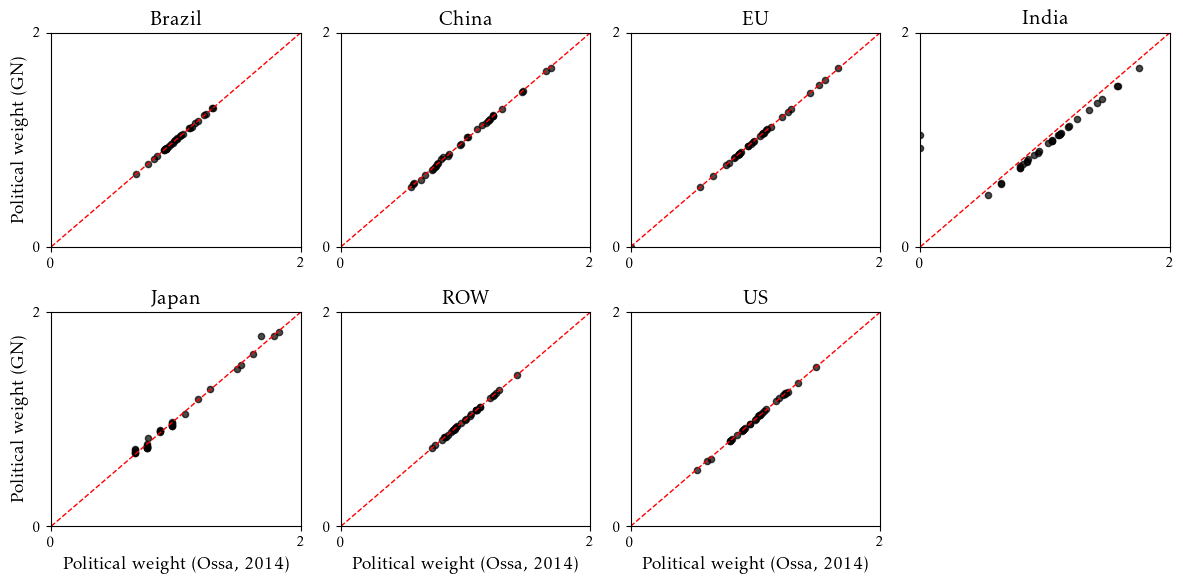

In [ ]:
### Figures
# Political economy weights comparison by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

lam_ossa = pd.read_csv('replication/04_output/lambda_ossa_noUB.csv', header=None)
lam_gn   = pd.read_csv('replication/04_output/lambda_gn_noUB.csv',   header=None)

n_country, n_ind = lam_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

lam_ossa_vals = lam_ossa.values.flatten()
lam_gn_vals   = lam_gn.values.flatten()

country_idx = np.repeat(np.arange(n_country), n_ind)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    x = lam_ossa.iloc[c, :].values
    y = lam_gn.iloc[c, :].values

    panel_max = max(x.max(), y.max())
    panel_max = np.ceil(panel_max)

    ax.scatter(x, y, color='black', s=20, alpha=0.7)

    xx = np.linspace(0, panel_max, 100)
    ax.plot(xx, xx, '--', color='red', linewidth=1)

    ax.set_title(countries[c])

    ax.set_xlim(0, panel_max)
    ax.set_ylim(0, panel_max)

    ax.set_xticks([0, panel_max])
    ax.set_yticks([0, panel_max])

    if c % 4 == 0:
        ax.set_ylabel("Political weight (GN)")
    if c >= 4:
        ax.set_xlabel("Political weight (Ossa, 2014)")

for k in range(n_country, len(axes)):
    axes[k].set_visible(False)

plt.tight_layout()
plt.savefig("replication/06_figures/fig_lambda_comparison_by_country_noUB.pdf", dpi=500, bbox_inches='tight')
plt.show()


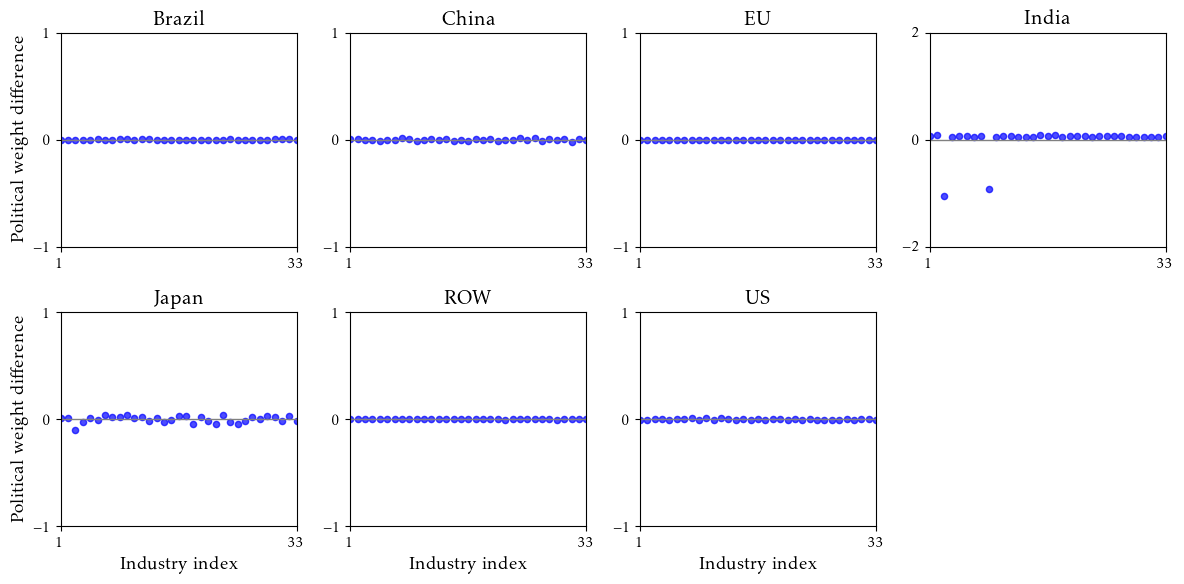

In [ ]:
# Political economy weights difference by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

lam_ossa = pd.read_csv('replication/04_output/lambda_ossa_noUB.csv', header=None)
lam_gn   = pd.read_csv('replication/04_output/lambda_gn_noUB.csv',   header=None)

n_country, n_ind = lam_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    ossa_vals = lam_ossa.iloc[c, :].values
    gn_vals   = lam_gn.iloc[c, :].values

    diff = ossa_vals - gn_vals

    # baseline
    ax.axhline(0, color='gray', linewidth=1)

    ax.scatter(
        np.arange(1, n_ind+1),
        diff,
        color='blue',
        s=20,
        alpha=0.7
    )

    ax.set_title(countries[c])

    ax.set_xlim(1, n_ind)
    ax.set_xticks([1, n_ind])

    diff_max = np.max(np.abs(diff))
    y_lim = np.ceil(diff_max)       

    ax.set_ylim(-y_lim, y_lim)
    ax.set_yticks([-y_lim, 0, y_lim])

    if c % 4 == 0:
        ax.set_ylabel("Political weight difference")
    if c >= 4:
        ax.set_xlabel("Industry index")

for k in range(n_country, len(axes)):
    axes[k].set_visible(False)

plt.tight_layout()
plt.savefig("replication/06_figures/fig_lambda_difference_by_country_noUB.pdf", dpi=500, bbox_inches='tight')
plt.show()


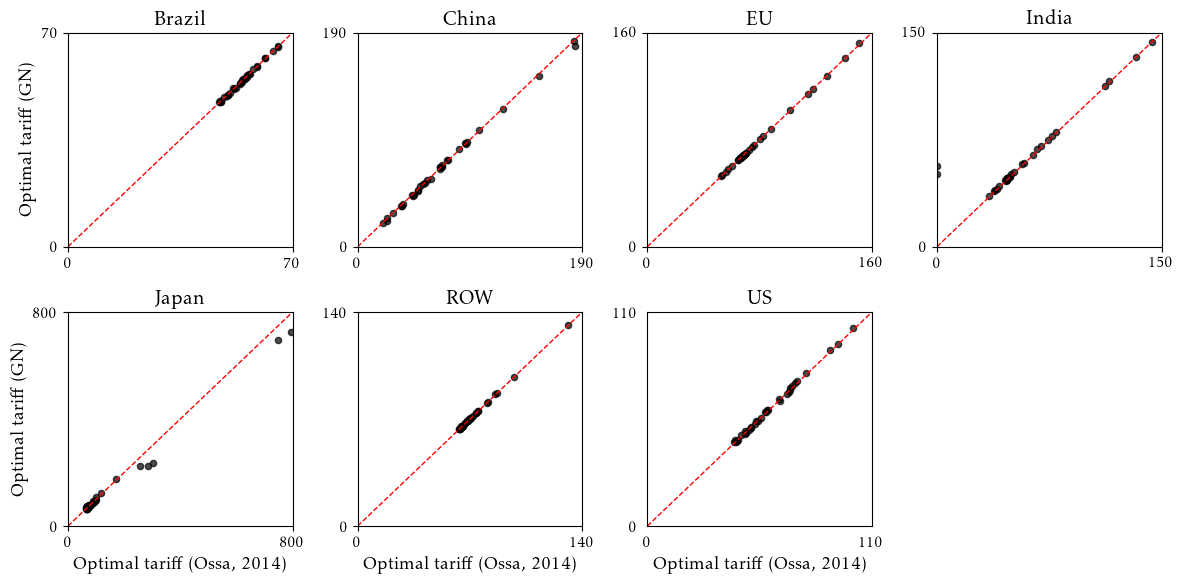

In [ ]:
# Optimal tariffs comparison by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

t_ossa = pd.read_csv('replication/04_output/optimal_tariff_ossa_noUB.csv', header=None)
t_gn   = pd.read_csv('replication/04_output/optimal_tariff_gn_noUB.csv',   header=None)

n_country, n_ind = t_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

# percent scale
t_ossa_vals = (t_ossa.values * 100).flatten()
t_gn_vals   = (t_gn.values   * 100).flatten()

country_idx = np.repeat(np.arange(n_country), n_ind)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    x = t_ossa.iloc[c, :].values * 100
    y = t_gn.iloc[c, :].values * 100

    # each panel's max value
    panel_max = max(x.max(), y.max())
    panel_max = np.ceil(panel_max / 10) * 10   # round up to nearest 10

    ax.scatter(x, y, color='black', s=20, alpha=0.7)

    xx = np.linspace(0, panel_max, 100)
    ax.plot(xx, xx, '--', color='red', linewidth=1)

    ax.set_title(countries[c])

    ax.set_xlim(0, panel_max)
    ax.set_ylim(0, panel_max)

    ax.set_xticks([0, panel_max])
    ax.set_yticks([0, panel_max])

    if c % 4 == 0:
        ax.set_ylabel("Optimal tariff (GN)")
    if c >= 4:
        ax.set_xlabel("Optimal tariff (Ossa, 2014)")

for k in range(n_country, len(axes)):
    axes[k].set_visible(False)

ax.tick_params(width=0)

plt.tight_layout()
plt.savefig("replication/06_figures/fig_tariff_comparison_by_country_noUB.pdf", dpi=500, bbox_inches='tight')
plt.show()


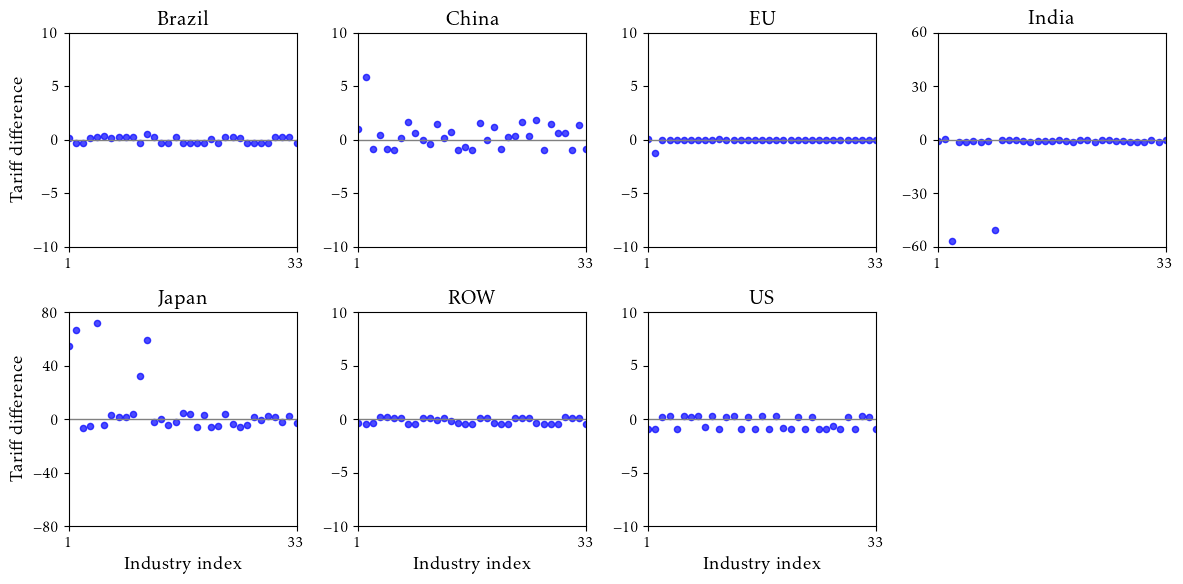

In [ ]:
# Optimal tariffs difference by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

t_ossa = pd.read_csv('replication/04_output/optimal_tariff_ossa_noUB.csv', header=None)
t_gn   = pd.read_csv('replication/04_output/optimal_tariff_gn_noUB.csv',   header=None)

n_country, n_ind = t_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    # tariffs in %
    ossa_vals = t_ossa.iloc[c, :].values * 100
    gn_vals   = t_gn.iloc[c, :].values * 100

    diff = ossa_vals - gn_vals

    ax.axhline(0, color='gray', linewidth=1)

    ax.scatter(
        np.arange(1, n_ind+1),
        diff,
        color='blue',
        s=20,
        alpha=0.7
    )

    ax.set_title(countries[c])

    ax.set_xlim(1, n_ind)
    ax.set_xticks([1, n_ind])

    diff_max = np.max(np.abs(diff))
    y_lim = max(10, np.ceil(diff_max / 10) * 10)  # round up to nearest 10

    ax.set_ylim(-y_lim, y_lim)
    ax.set_yticks([-y_lim, -y_lim/2, 0, y_lim/2, y_lim])

    if c % 4 == 0:
        ax.set_ylabel("Tariff difference")
    if c >= 4:
        ax.set_xlabel("Industry index")

for k in range(n_country, len(axes)):
    axes[k].set_visible(False)

plt.tight_layout()
plt.savefig("replication/06_figures/fig_tariff_difference_by_country_noUB.pdf", dpi=500, bbox_inches='tight')
plt.show()


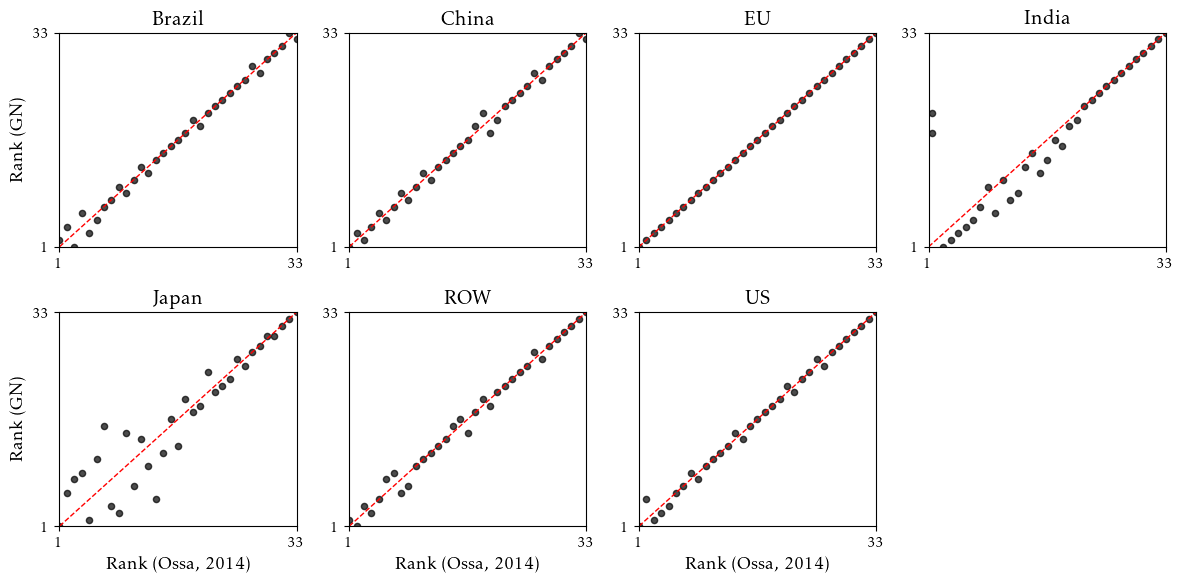

In [ ]:
# Rank comparison by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

t_ossa = pd.read_csv('replication/04_output/optimal_tariff_ossa_noUB.csv', header=None)
t_gn   = pd.read_csv('replication/04_output/optimal_tariff_gn_noUB.csv',   header=None)

n_country, n_ind = t_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    r1 = t_ossa.iloc[c, :].rank(ascending=True)
    r2 = t_gn.iloc[c, :].rank(ascending=True)

    ax.scatter(r1, r2, alpha=0.7, color='black', s=20)

    # 45-degree line
    xx = np.linspace(1, n_ind, 100)
    ax.plot(xx, xx, '--', color='red', linewidth=1)

    ax.set_title(countries[c])
    ax.set_xlim(1, n_ind)
    ax.set_ylim(1, n_ind)
    ax.set_xticks([1, n_ind])
    ax.set_yticks([1, n_ind])

    if c % 4 == 0:
        ax.set_ylabel("Rank (GN)")
    if c >= 4:
        ax.set_xlabel("Rank (Ossa, 2014)")

if n_country < len(axes):
    for k in range(n_country, len(axes)):
        axes[k].set_visible(False)

plt.tight_layout()
plt.savefig("replication/06_figures/fig_rank_comparison_by_country_noUB.pdf", dpi=500, bbox_inches='tight')
plt.show()


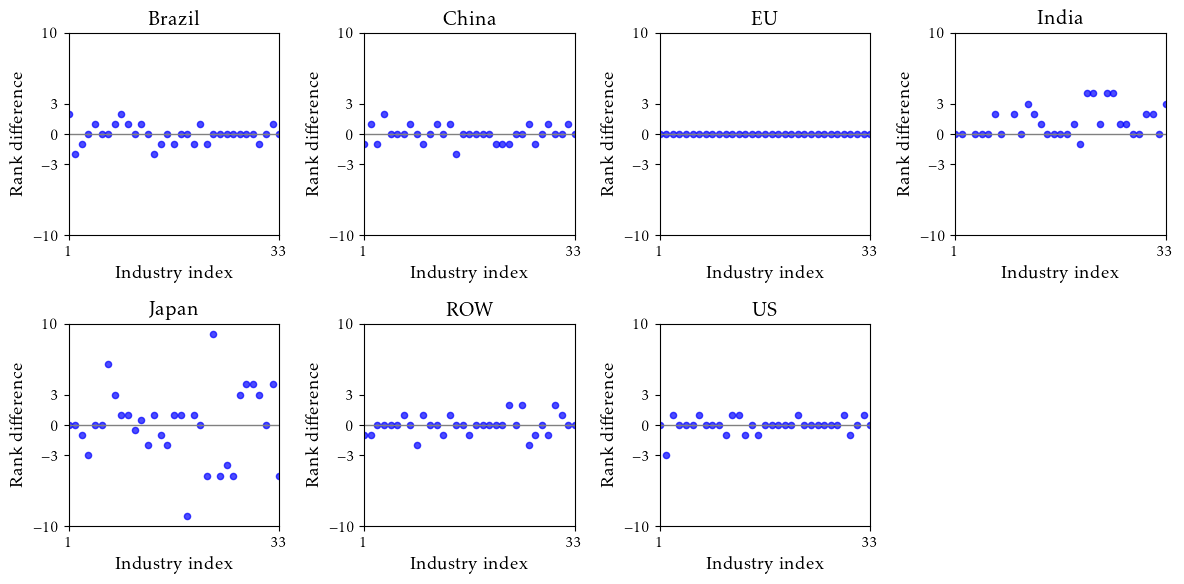

In [ ]:
# Rank difference by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

t_ossa = pd.read_csv('replication/04_output/optimal_tariff_ossa_noUB.csv', header=None)
t_gn   = pd.read_csv('replication/04_output/optimal_tariff_gn_noUB.csv',   header=None)

n_country, n_ind = t_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    r1 = t_ossa.iloc[c, :].rank(ascending=True)
    r2 = t_gn.iloc[c, :].rank(ascending=True)
    diff = r1 - r2

    ax.axhline(0, color='gray', linewidth=1)

    ax.scatter(
        range(1, n_ind+1), diff,
        color='blue', s=20, alpha=0.7
    )

    ax.set_title(countries[c])

    ax.set_xlim(1, n_ind)
    ax.set_xticks([1, n_ind])

    ax.set_ylim(-10, 10)
    ax.set_yticks([-10, -3, 0, 3, 10])

    ax.set_ylabel("Rank difference")
    ax.set_xlabel("Industry index")

if n_country < len(axes):
    for k in range(n_country, len(axes)):
        axes[k].set_visible(False)

plt.tight_layout()
plt.savefig("replication/06_figures/fig_rank_difference_by_country_noUB.pdf", dpi=500, bbox_inches='tight')
plt.show()

